In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sqlite3

In [2]:
con = sqlite3.connect('csv_database.db')

In [3]:
df_fromstation_count = pd.read_sql_query('''
                        SELECT from_station_name, COUNT(from_station_name)
                        FROM data
                        GROUP BY from_station_name''', con)

In [5]:
df_fromstation_count.tail(5)

,from_station_name,COUNT(from_station_name)
651,Wood St & Taylor St,19127
652,Woodlawn Ave & 55th St,8759
653,Woodlawn Ave & 75th St,15
654,Woodlawn Ave & Lake Park Ave,1929
655,Yates Blvd & 75th St,189


In [52]:
def minimalhbargraph(title, fontsize=35):
    """Disables axis ticks and labels, outer axis 'box', sets seaborn context.
       Makes the graph very minimalist.
    """
    sns.set_context('poster')
    ax.set_ylabel('')
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout()
    ax.axis('off')
    ax.set_title(title, fontsize=fontsize)

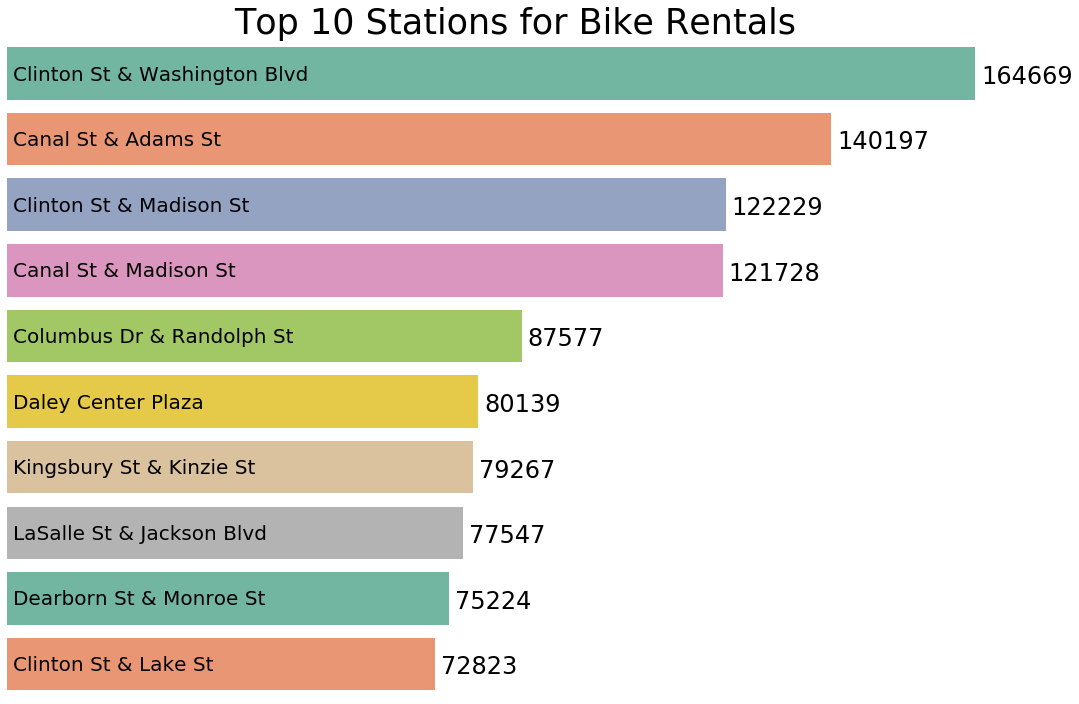

In [39]:
df = df_fromstation_count.sort_values('COUNT(from_station_name)', ascending=False).head(10).set_index('from_station_name')
plt.figure(figsize=(15,10))
ax = sns.barplot(df['COUNT(from_station_name)'], df.index, palette='Set2')
minimalhbargraph(title="Top 10 Stations for Bike Rentals")
num = 0
for i in ax.patches:
    ax.text(i.get_width()+1000, i.get_y()+0.55, str(round(i.get_width()))[:-2], fontsize = 24, color = 'k')
    ax.text(1000 , i.get_y()+0.5, str(df.index[num]), fontsize = 20, color = 'k')
    num += 1

In [47]:
df_users_gender_count = pd.read_sql_query('''
                        SELECT gender, COUNT(gender) as count_gender
                        FROM data
                        GROUP BY gender''', con)

In [48]:
df_users_gender_count.tail(5)

,gender,count_gender
0,Female,2378675
1,Male,7116560


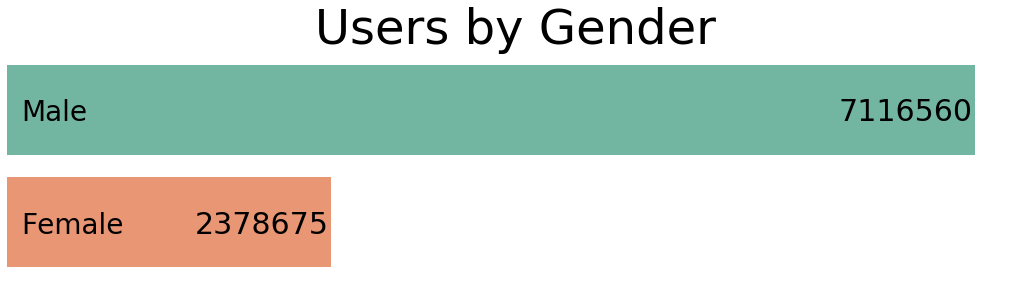

In [63]:
df = df_users_gender_count.sort_values('count_gender', ascending=False).set_index('gender')
plt.figure(figsize=(15,4))
ax = sns.barplot(df['count_gender'], df.index, palette='Set2')
minimalhbargraph(title="Users by Gender", fontsize=48)
num = 0
for i in ax.patches:
    ax.text(i.get_width()-1000000, i.get_y()+0.5, str(round(i.get_width()))[:-2], fontsize = 30, color = 'k')
    ax.text(100000 , i.get_y()+0.5, str(df.index[num]), fontsize = 28, color = 'k')
    num += 1